# Case study: How does a bike-share navigate speedy success?

### Scenario: 
You are a junior data analyst working on the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

### Characters and teams: 
#### ● Lily Moreno: 
The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels. 
#### ● Cyclistic marketing analytics team: 
A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals—as well as how you, as a junior data analyst, can help Cyclistic achieve them.
#### ● Cyclistic executive team: 
The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program. 

## Do your research and explain your finding. Recommend what is the best course of action. 




# Code: 

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import data
path = r"C:\Users\billt\Downloads"
file_name = "202101-divvy-tripdata.csv"
file_path = r"%s\%s" % (path, file_name)
data = pd.read_csv(file_path)

In [3]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [4]:
#select columns used
trim_data = data[["rideable_type", "started_at", "ended_at", "member_casual"]]

In [5]:
#add "started_at_dt" and "ended_at_dt" to trim_data
trim_data["started_at_dt"] = pd.to_datetime(trim_data["started_at"])
trim_data["ended_at_dt"] = pd.to_datetime(trim_data["ended_at"])

<ipython-input-5-c88b3431efdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trim_data["started_at_dt"] = pd.to_datetime(trim_data["started_at"])
<ipython-input-5-c88b3431efdc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trim_data["ended_at_dt"] = pd.to_datetime(trim_data["ended_at"])


In [6]:
#find the duration (also in date time format)
trim_data["duration"] = trim_data["ended_at_dt"] - trim_data["started_at_dt"]

<ipython-input-6-8f3dce91bb3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trim_data["duration"] = trim_data["ended_at_dt"] - trim_data["started_at_dt"]


In [7]:
trim_data.head()

,rideable_type,started_at,ended_at,member_casual,started_at_dt,ended_at_dt,duration
0,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member,2021-01-23 16:14:19,2021-01-23 16:24:44,0 days 00:10:25
1,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member,2021-01-27 18:43:08,2021-01-27 18:47:12,0 days 00:04:04
2,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member,2021-01-21 22:35:54,2021-01-21 22:37:14,0 days 00:01:20
3,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member,2021-01-07 13:31:13,2021-01-07 13:42:55,0 days 00:11:42
4,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual,2021-01-23 02:24:02,2021-01-23 02:24:45,0 days 00:00:43


In [8]:
#sort by start_time small to large
trim_data_sorted = trim_data.sort_values("started_at_dt")
trim_data_sorted.head()

,rideable_type,started_at,ended_at,member_casual,started_at_dt,ended_at_dt,duration
73670,electric_bike,2021-01-01 00:02:05,2021-01-01 00:12:39,member,2021-01-01 00:02:05,2021-01-01 00:12:39,0 days 00:10:34
78336,classic_bike,2021-01-01 00:02:24,2021-01-01 00:08:39,member,2021-01-01 00:02:24,2021-01-01 00:08:39,0 days 00:06:15
39961,classic_bike,2021-01-01 00:06:55,2021-01-01 00:26:36,member,2021-01-01 00:06:55,2021-01-01 00:26:36,0 days 00:19:41
34046,electric_bike,2021-01-01 00:12:13,2021-01-01 00:20:06,member,2021-01-01 00:12:13,2021-01-01 00:20:06,0 days 00:07:53
33916,classic_bike,2021-01-01 00:12:21,2021-01-01 00:12:33,member,2021-01-01 00:12:21,2021-01-01 00:12:33,0 days 00:00:12


In [9]:
#seperate data into member and non-member, classical bike and electric bike
member_data = trim_data[trim_data["member_casual"] == "member"]
non_member_data = trim_data[trim_data["member_casual"] == "casual"]

member_data_classical = member_data[member_data["rideable_type"] == "classic_bike"]
member_data_electric = member_data[member_data["rideable_type"] == "electric_bike"]

non_member_data_classical = non_member_data[non_member_data["rideable_type"] == "classic_bike"]
non_member_data_electric = non_member_data[non_member_data["rideable_type"] == "electric_bike"]

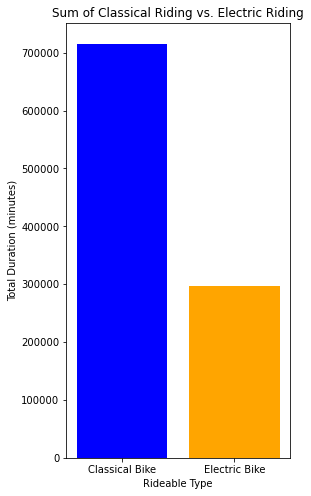

In [10]:
#find total classical biking time vs electric biking time
total_sum_classical = member_data_classical["duration"].dt.total_seconds().sum() / 60
total_sum_electric = member_data_electric["duration"].dt.total_seconds().sum() / 60

#plotting time of classical riding vs electric riding
plt.figure(figsize=(4, 8))
plt.bar(['Classical Bike', 'Electric Bike'], [total_sum_classical, total_sum_electric], color=['blue', 'orange'])
plt.title('Sum of Classical Riding vs. Electric Riding')
plt.xlabel('Rideable Type')
plt.ylabel('Total Duration (minutes)')
plt.show()

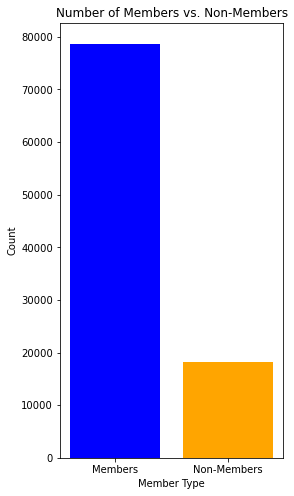

In [11]:
#find number of members and non-members
total_count_members = member_data.shape[0]
total_count_non_members = non_member_data.shape[0]

#plotting number of members vs non-members
plt.figure(figsize=(4, 8))
plt.bar(['Members', 'Non-Members'], [total_count_members, total_count_non_members], color=['blue', 'orange'])
plt.title('Number of Members vs. Non-Members')
plt.xlabel('Member Type')
plt.ylabel('Count')

plt.show()

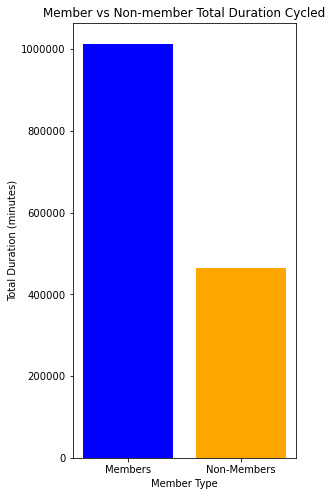

In [12]:
#find sum of members riding time vs non members riding time
total_sum_members = member_data["duration"].dt.total_seconds().sum() / 60
total_sum_non_members = non_member_data["duration"].dt.total_seconds().sum() / 60

#plotting ...
plt.figure(figsize=(4, 8))
plt.bar(['Members', 'Non-Members'], [total_sum_members, total_sum_non_members], color=['blue', 'orange'])
#plt.title('Total Sum of Members\' Riding vs. Non-Members\' Riding')
plt.xlabel('Member Type')
plt.ylabel('Total Duration (minutes)')
plt.title('Member vs Non-member Total Duration Cycled')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Conclusion
### No. of Members vs Non-members:
The graph reveals that a large majority of bike riders are members, with a comparatively lower number of non-members using the bikes. Therefore, prioritizing to convert non-members into members may not be the most effective strategy.

### Preference for Classical Bikes:
The data indicates that more classical bikes are used among bike riders. It may be because of their preference, or perhaps electric bikes are not that common yet. Further research can be done to see if prioritizing the availability and promotion of classical bikes is recommended. 

### Potential Insights for Further Investigation: 
Despite the lower number of non-members riding, their individual ride durations contribute approximately one-third of the total duration. This suggests a hypothesis that non-members might not ride frequently, but when they do, they tend to ride for an extended period. Further research could explore the factors influencing non-members' sporadic but extended bike rides.
